<a href="https://colab.research.google.com/github/Euniceheredia/DATASCIENCE/blob/main/Tarea_Semana4_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Cargar librerias necesarias
from google.colab import drive
drive.mount('content/')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


Mounted at content/


About the Dataset

Pregnancies :- Number of times a woman has been pregnant

Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure :- Diastollic Blood Pressure (mm hg)

SkinThickness :- Triceps skin fold thickness(mm)

Insulin :- 2 hour serum insulin(mu U/ml)

BMI :- Body Mass Index ((weight in kg/height in m)^2)

Age :- Age(years)

DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)

Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)



ETL PROCESS

In [ ]:
# Extraer la data, dataset diabetes.csv
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/diabetes.csv')
df.sample(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
502,6,0,68,41,0,39.0,0.727,41,1
87,2,100,68,25,71,38.5,0.324,26,0
112,1,89,76,34,37,31.2,0.192,23,0
629,4,94,65,22,0,24.7,0.148,21,0
663,9,145,80,46,130,37.9,0.637,40,1
501,3,84,72,32,0,37.2,0.267,28,0
43,9,171,110,24,240,45.4,0.721,54,1
125,1,88,30,42,99,55.0,0.496,26,1
483,0,84,82,31,125,38.2,0.233,23,0
698,4,127,88,11,155,34.5,0.598,28,0


In [ ]:
# Explore y entienda su dataset con los diferentes metodos de Pandas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Haga las imputaciones de lugar en las columnas que lo requieran, utilice el metodo estadistico que mas convenga
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
promedio_sin_ceros_insulina =df["Insulin"].mean().mean()


# Reemplaza los valores cero con el promedio calculado
df_reemplazado = df.replace(0, promedio_sin_ceros_insulina)


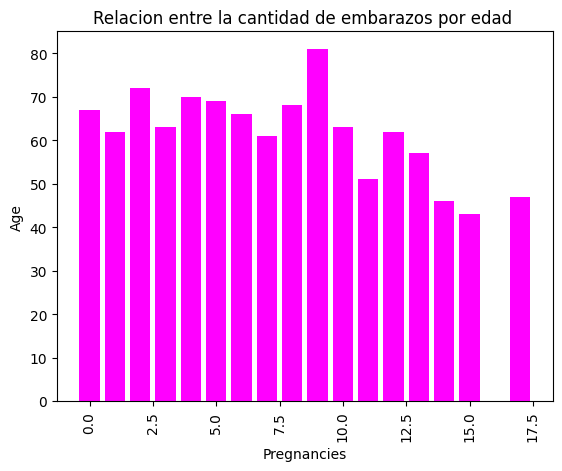

In [ ]:
# Haga visualizaciones de la data incluyendo heatmap para ver la relacion de las caracteristicas del dataset
# Gráfico de barras
plt.bar(df['Pregnancies'], df['Age'], color="magenta")
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.title('Relacion entre la cantidad de embarazos por edad ')
plt.xticks(rotation = 90);
plt.show()

Como se indica en la grafica, las mujeres con mayor edad han tenido una mayor cantidad de embarazos.

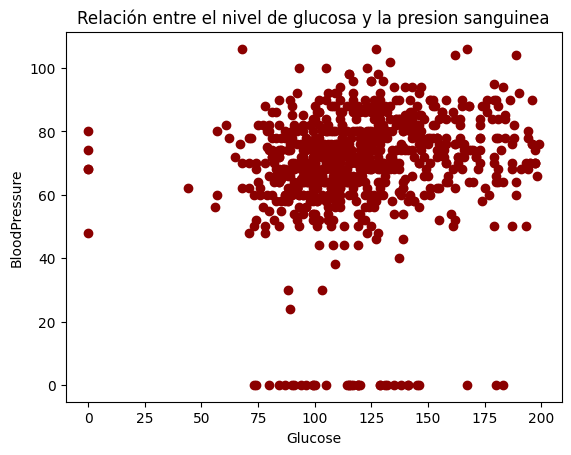

In [ ]:
# Graficar gráfico de dispersión
plt.scatter(df['Glucose'], df['BloodPressure'], color="darkred")
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Relación entre el nivel de glucosa y la presion sanguinea')
plt.show()

La grafica identifica que hay una relacion directa entre la estabilidad de la glucosa y el nivel de la presion. Cuando la glucosa no tuvo picos altos, la presion sanguinea se mantuvo estable.

In [ ]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~(df['Glucose'] > lower_bound) | (df['Glucose'] < upper_bound)]

In [ ]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~(df['BloodPressure'] > lower_bound) | (df['BloodPressure'] < upper_bound)]

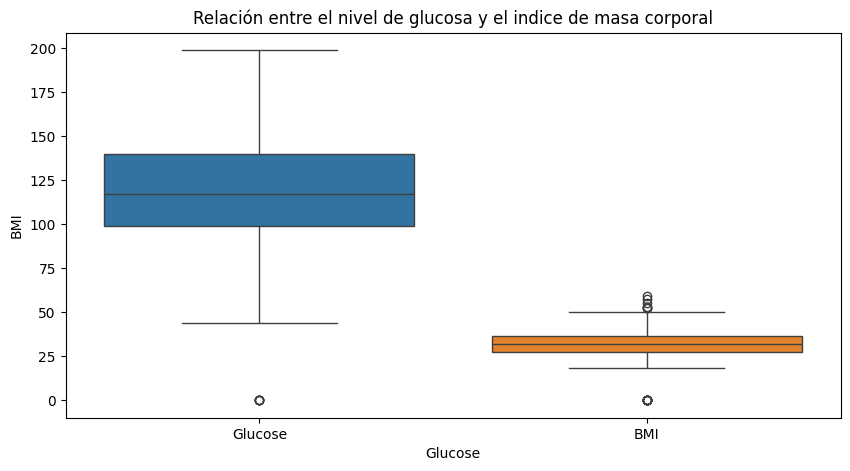

In [ ]:
columnas_consideradas = ['Glucose', 'BMI']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columnas_consideradas])


plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Relación entre el nivel de glucosa y el indice de masa corporal')
plt.show()

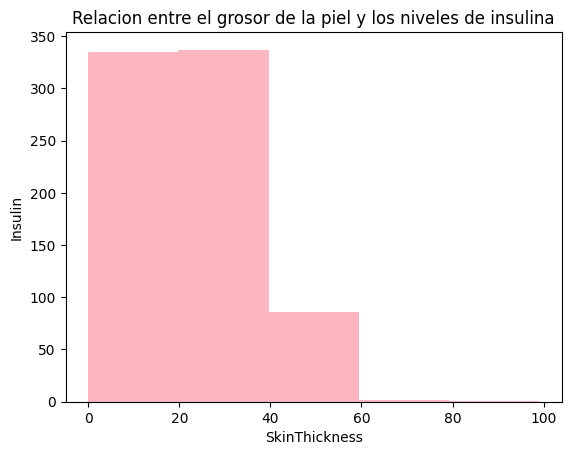

In [ ]:
#Histograma
plt.hist(df['SkinThickness'], bins=5, color="lightpink")
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('Relacion entre el grosor de la piel y los niveles de insulina')
plt.show()

Una piel con mayor grosor es mas resistente a los picos de insulina. Los musculos contrarestan las subidas.

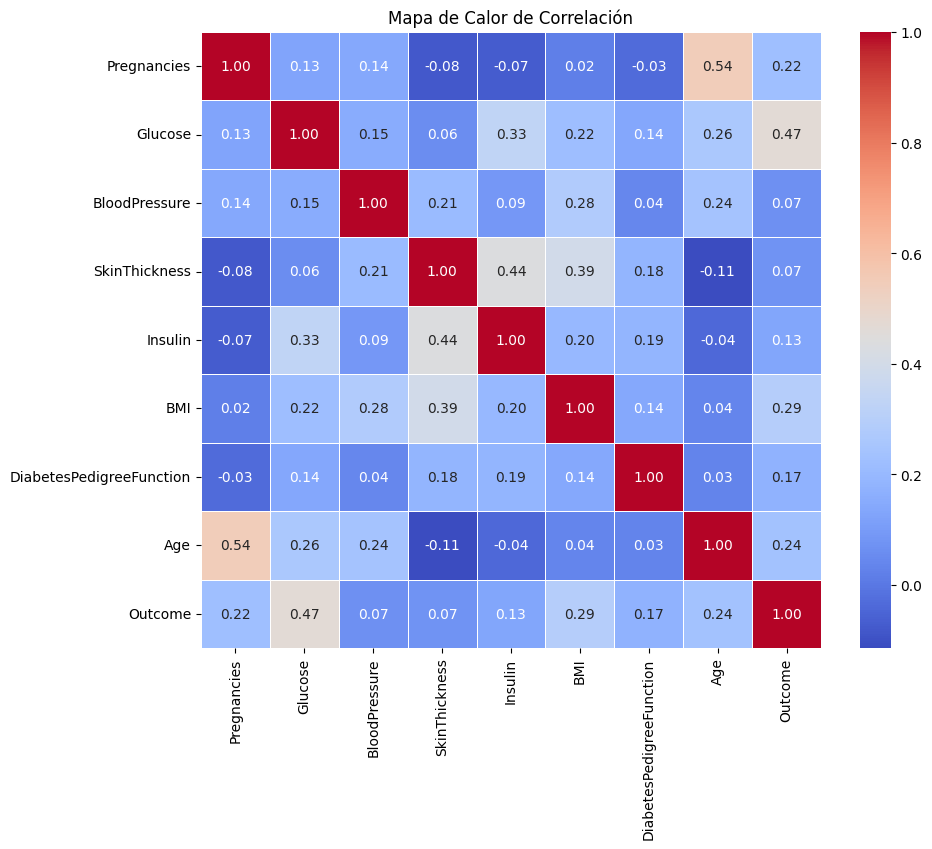

In [ ]:
# Ejemplo de datos (matriz de correlación)
data = pd.read_csv("/content/content/MyDrive/Colab Notebooks/diabetes.csv")
correlation_matrix = data.corr()  # Calculamos la matriz de correlación

# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

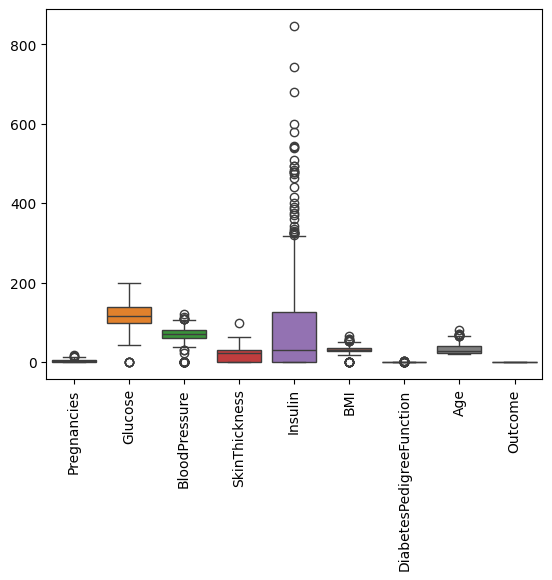

In [ ]:
# Crear un diagrama de caja
data =pd.read_csv( "/content/content/MyDrive/Colab Notebooks/diabetes.csv")
sns.boxplot(data)
plt.xticks(rotation = 90)
# Mostrar el diagrama de caja
plt.show()


In [ ]:
# Divida la data de prueba y entrenamiento. Continue con los demas paso hasta llegar a las metricas para evaluar el modelo de prediccion

X = df.drop(columns="Outcome")

y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
df.shape


(761, 9)

In [ ]:
X_train.shape

(570, 8)

In [ ]:
y_train.shape

(570,)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Intanciamos el modelo de clasificacion y se lo signamos a una variable
dtc = DecisionTreeClassifier()
# Instanciamos el metodo StandardScaler para escalar los valores numericos a unidades mas pequeñas
scaler = StandardScaler()
# Creamos un pipeline donde pasaremos la accion que este hara y el modelo de clasificacion al que se le aplicara dicha accion
#  Ej:. make_pipeline(metodo, modelo)

classification_pipe = make_pipeline(scaler, dtc)

# Por ultimo ajustamos el conjunto de datos de entremaniento de X y "y" al pipeline cargado

classification_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
# Diagrama de los pasos que seguira y aplicara nuestro pipeline a nuestro conjunto de datos
y_pred = classification_pipe.predict(X_test)

print("Precciones: ",y_pred)

Precciones:  [1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 0]


In [ ]:
# Verifique las metricas para validar que tambien esta prediciendo el modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       129
           1       0.51      0.58      0.55        62

    accuracy                           0.69       191
   macro avg       0.65      0.66      0.65       191
weighted avg       0.70      0.69      0.69       191

